In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets.mnist import load_data


(60000, 28, 28)
(60000,)


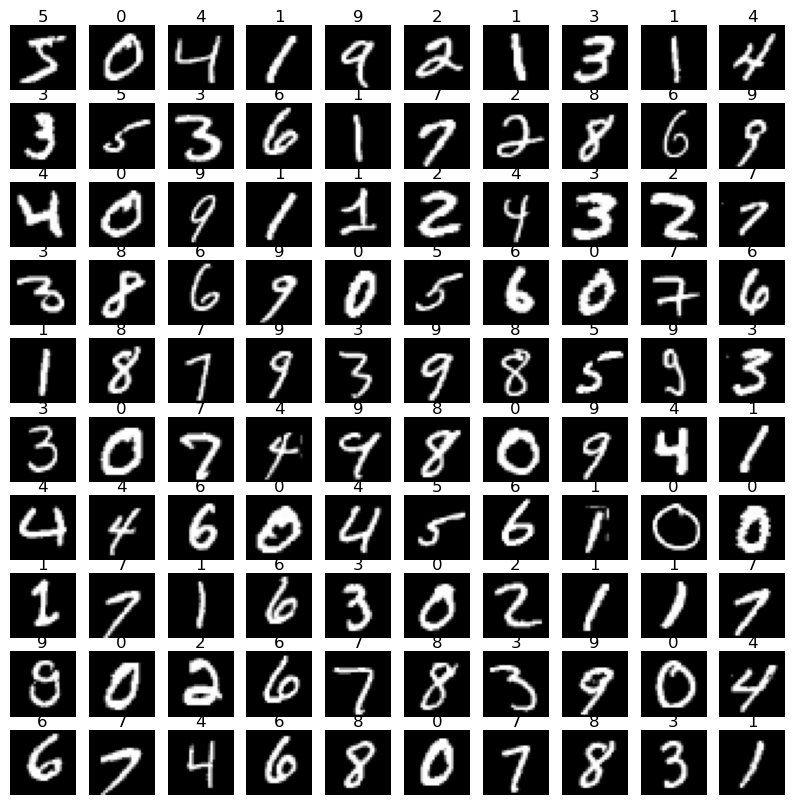

In [31]:
# load the data
(X_train, y_train_un), (X_test, y_test) = load_data(path='mnist.npz');

print(X_train.shape);
print(y_train.shape);
plt.figure(figsize=(10, 10));
for i in range(0,100):
    plt.subplot(10, 10, i+1);
    plt.imshow(X_train[i], cmap="gray");
    plt.title(y_train[i], pad=-1)
    plt.axis('off');
plt.show();

In [57]:
# change the data
y_train = np.zeros((len(y_train_un), 10));
for i in range(len(y_train_un)):
    tmp = np.zeros(10);
    tmp[y_train_un[i]] = 1;
    y_train[i] = tmp
X_train = X_train.reshape((60000, 1, -1))[:, 0, :];
print(X_train.shape)
print(y_train)

(60000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [87]:
# making the model
model = Sequential(layers = [
    Dense(784, activation = 'relu'),
    Dense(1176, activation = 'relu'),
    Dense(823, activation = 'relu'),
    Dense(494, activation = 'relu'),
    Dense(197, activation = 'relu'),
    Dense(78, activation = 'relu'),
    Dense(23, activation = 'relu'),
    Dense(10, activation = 'linear')
]);


In [91]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam());

In [92]:
model.fit(X_train, y_train, epochs=10);

Epoch 1/10
1875/1875 [==============================] - 49s 25ms/step - loss: 2.1262
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.6455
Epoch 3/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.2314
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1538
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1272
Epoch 6/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1038
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1168
Epoch 8/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0868
Epoch 9/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0779
Epoch 10/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0613


graph


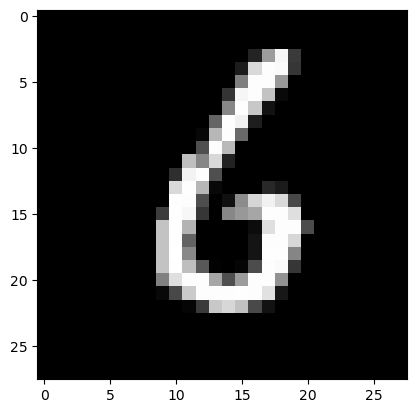

1/1 [==============================] - 0s 23ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 0.0
------------- indice: 4 0.0
------------- indice: 5 0.0004
------------- indice: 6 0.9996
------------- indice: 7 0.0
------------- indice: 8 0.0
------------- indice: 9 0.0
6
6


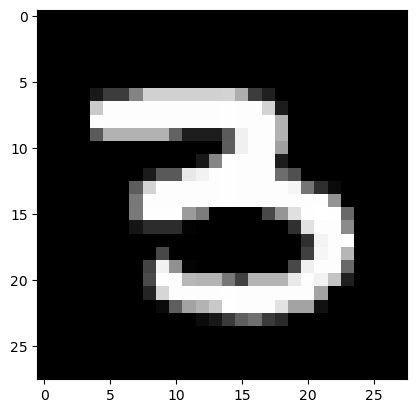

1/1 [==============================] - 0s 20ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 1.0
------------- indice: 4 0.0
------------- indice: 5 0.0
------------- indice: 6 0.0
------------- indice: 7 0.0
------------- indice: 8 0.0
------------- indice: 9 0.0
3
3


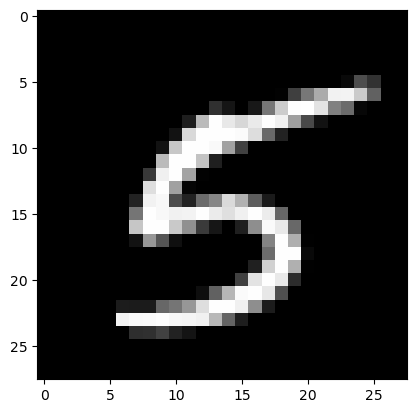

1/1 [==============================] - 0s 37ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 0.0
------------- indice: 4 0.0
------------- indice: 5 1.0
------------- indice: 6 0.0
------------- indice: 7 0.0
------------- indice: 8 0.0
------------- indice: 9 0.0
5
5


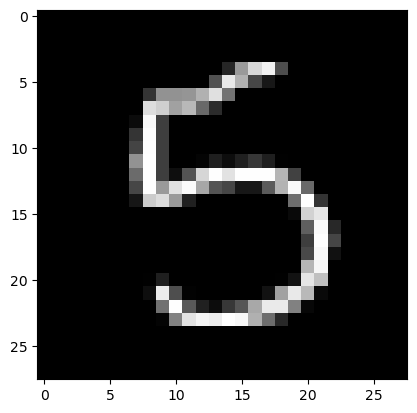

1/1 [==============================] - 0s 20ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 0.0
------------- indice: 4 0.0
------------- indice: 5 1.0
------------- indice: 6 0.0
------------- indice: 7 0.0
------------- indice: 8 0.0
------------- indice: 9 0.0
5
5


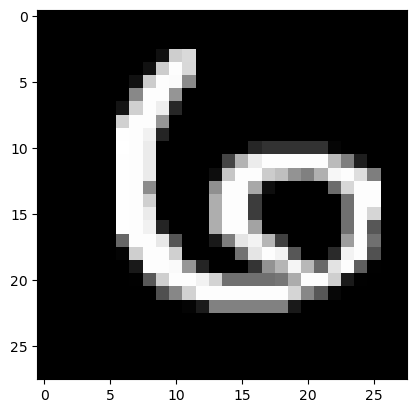

1/1 [==============================] - 0s 36ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 0.0
------------- indice: 4 0.0
------------- indice: 5 0.0
------------- indice: 6 1.0
------------- indice: 7 0.0
------------- indice: 8 0.0
------------- indice: 9 0.0
6
6


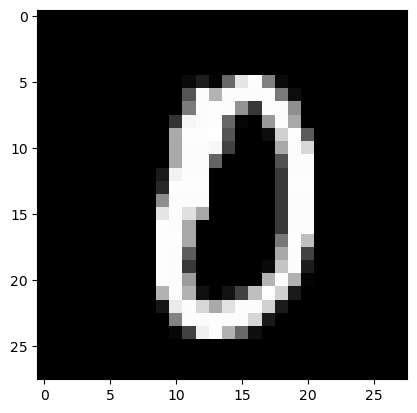

1/1 [==============================] - 0s 46ms/step
------------- indice: 0 0.9996
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 0.0
------------- indice: 4 0.0
------------- indice: 5 0.0
------------- indice: 6 0.0001
------------- indice: 7 0.0
------------- indice: 8 0.0
------------- indice: 9 0.0003
0
0


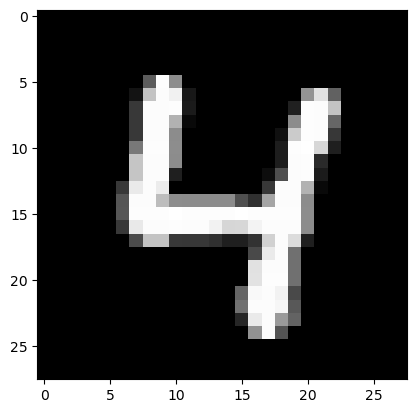

1/1 [==============================] - 0s 28ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 0.0
------------- indice: 4 1.0
------------- indice: 5 0.0
------------- indice: 6 0.0
------------- indice: 7 0.0
------------- indice: 8 0.0
------------- indice: 9 0.0
4
4


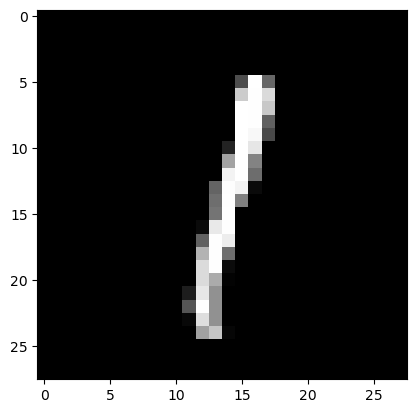

1/1 [==============================] - 0s 26ms/step
------------- indice: 0 0.0
------------- indice: 1 1.0
------------- indice: 2 0.0
------------- indice: 3 0.0
------------- indice: 4 0.0
------------- indice: 5 0.0
------------- indice: 6 0.0
------------- indice: 7 0.0
------------- indice: 8 0.0
------------- indice: 9 0.0
1
1


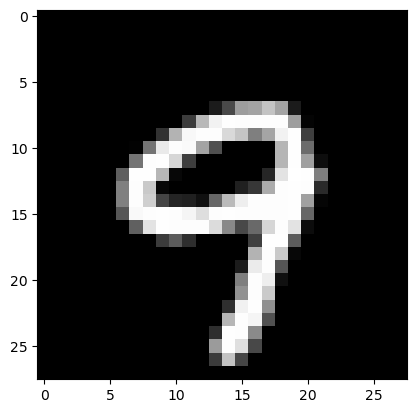

1/1 [==============================] - 0s 46ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 0.0
------------- indice: 4 0.0
------------- indice: 5 0.0
------------- indice: 6 0.0
------------- indice: 7 0.0
------------- indice: 8 0.0
------------- indice: 9 1.0
9
9


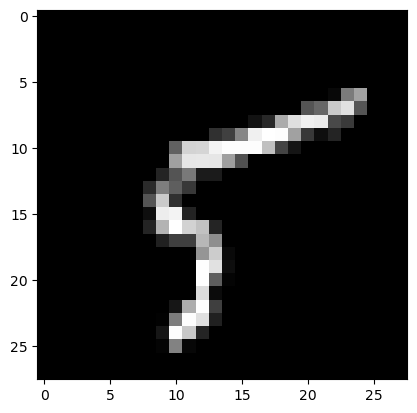

1/1 [==============================] - 0s 23ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 0.0
------------- indice: 4 0.0
------------- indice: 5 1.0
------------- indice: 6 0.0
------------- indice: 7 0.0
------------- indice: 8 0.0
------------- indice: 9 0.0
5
5


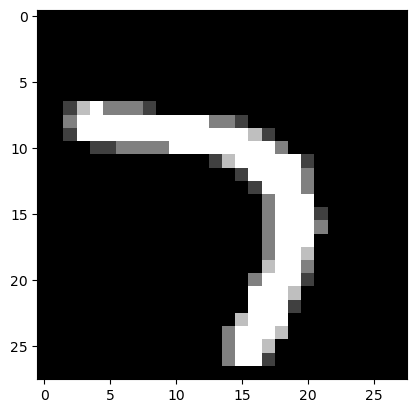

1/1 [==============================] - 0s 20ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 0.0
------------- indice: 4 0.0
------------- indice: 5 0.0
------------- indice: 6 0.0
------------- indice: 7 1.0
------------- indice: 8 0.0
------------- indice: 9 0.0
7
7


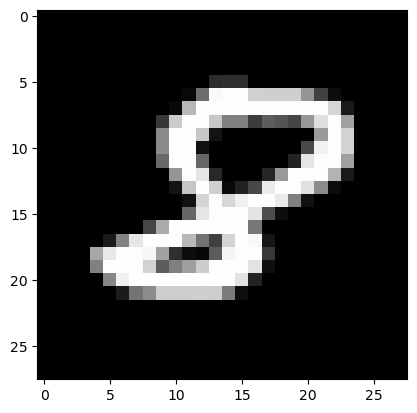

1/1 [==============================] - 0s 26ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0087
------------- indice: 2 0.013
------------- indice: 3 0.0031
------------- indice: 4 0.0
------------- indice: 5 0.0
------------- indice: 6 0.0
------------- indice: 7 0.0
------------- indice: 8 0.975
------------- indice: 9 0.0002
8
8


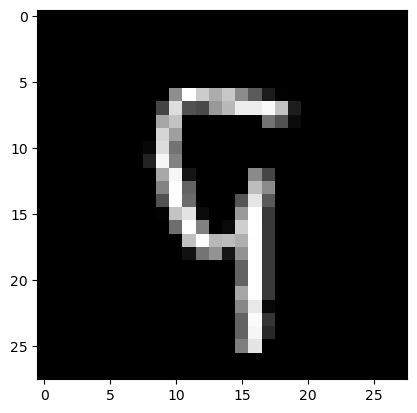

1/1 [==============================] - 0s 54ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 0.0
------------- indice: 4 0.0009
------------- indice: 5 0.0
------------- indice: 6 0.0
------------- indice: 7 0.0005
------------- indice: 8 0.0
------------- indice: 9 0.9986
9
9


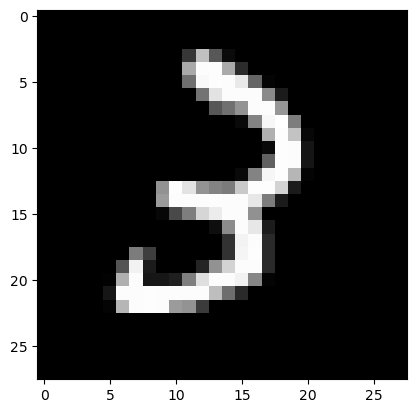

1/1 [==============================] - 0s 21ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 0.0045
------------- indice: 3 0.9942
------------- indice: 4 0.0
------------- indice: 5 0.0012
------------- indice: 6 0.0
------------- indice: 7 0.0
------------- indice: 8 0.0001
------------- indice: 9 0.0
3
3


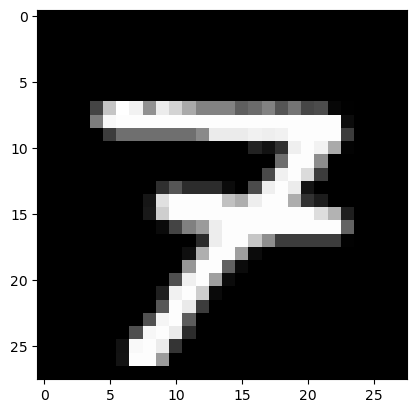

1/1 [==============================] - 0s 21ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 0.0
------------- indice: 4 0.0
------------- indice: 5 0.0
------------- indice: 6 0.0
------------- indice: 7 1.0
------------- indice: 8 0.0
------------- indice: 9 0.0
7
7


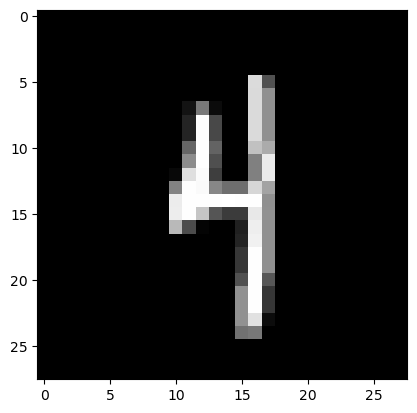

1/1 [==============================] - 0s 28ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 0.0026
------------- indice: 4 0.975
------------- indice: 5 0.0002
------------- indice: 6 0.0005
------------- indice: 7 0.0017
------------- indice: 8 0.0
------------- indice: 9 0.02
4
4


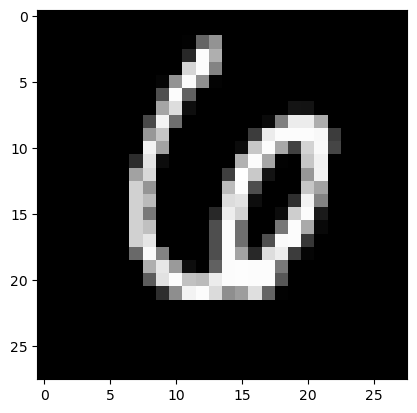

1/1 [==============================] - 0s 21ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 0.0
------------- indice: 4 0.0
------------- indice: 5 0.0002
------------- indice: 6 0.9997
------------- indice: 7 0.0
------------- indice: 8 0.0
------------- indice: 9 0.0
6
6


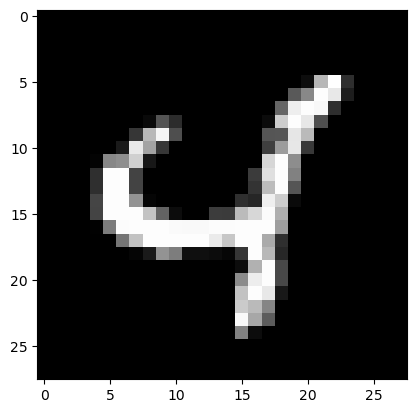

1/1 [==============================] - 0s 23ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 0.0
------------- indice: 4 1.0
------------- indice: 5 0.0
------------- indice: 6 0.0
------------- indice: 7 0.0
------------- indice: 8 0.0
------------- indice: 9 0.0
4
4


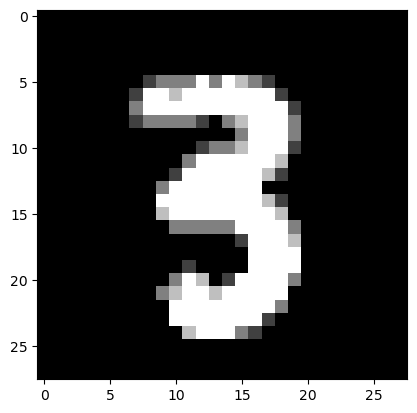

1/1 [==============================] - 0s 53ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 1.0
------------- indice: 4 0.0
------------- indice: 5 0.0
------------- indice: 6 0.0
------------- indice: 7 0.0
------------- indice: 8 0.0
------------- indice: 9 0.0
3
3


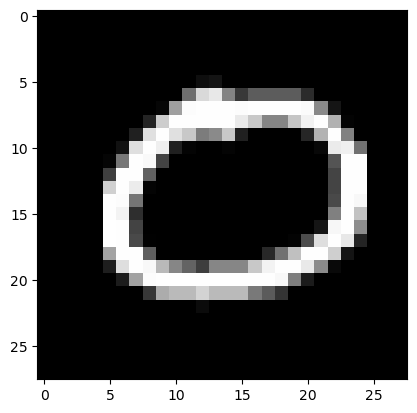

1/1 [==============================] - 0s 24ms/step
------------- indice: 0 1.0
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 0.0
------------- indice: 4 0.0
------------- indice: 5 0.0
------------- indice: 6 0.0
------------- indice: 7 0.0
------------- indice: 8 0.0
------------- indice: 9 0.0
0
0


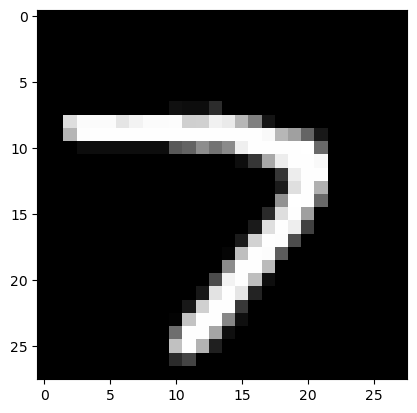

1/1 [==============================] - 0s 29ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 0.0
------------- indice: 4 0.0
------------- indice: 5 0.0
------------- indice: 6 0.0
------------- indice: 7 1.0
------------- indice: 8 0.0
------------- indice: 9 0.0
7
7


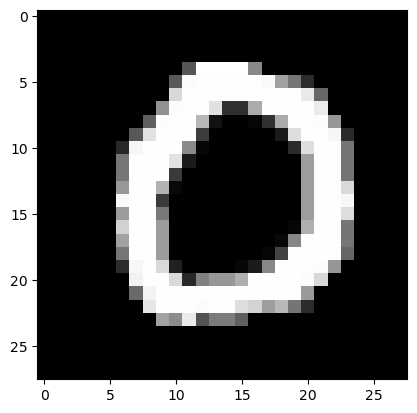

1/1 [==============================] - 0s 24ms/step
------------- indice: 0 1.0
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 0.0
------------- indice: 4 0.0
------------- indice: 5 0.0
------------- indice: 6 0.0
------------- indice: 7 0.0
------------- indice: 8 0.0
------------- indice: 9 0.0
0
0


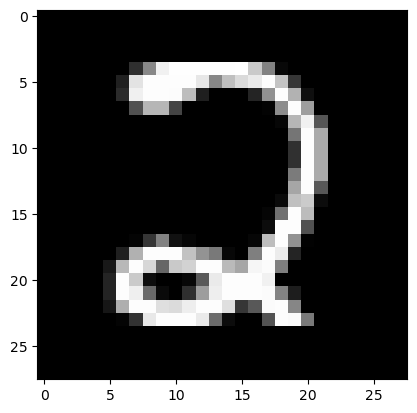

1/1 [==============================] - 0s 20ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 1.0
------------- indice: 3 0.0
------------- indice: 4 0.0
------------- indice: 5 0.0
------------- indice: 6 0.0
------------- indice: 7 0.0
------------- indice: 8 0.0
------------- indice: 9 0.0
2
2


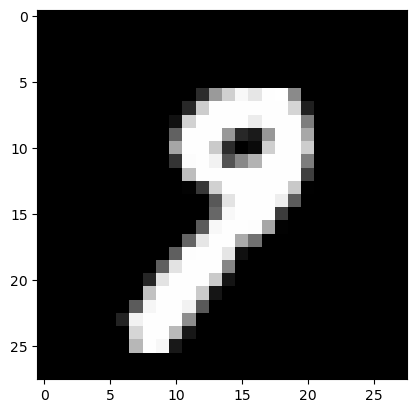

1/1 [==============================] - 0s 39ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 0.0
------------- indice: 4 0.0007
------------- indice: 5 0.0
------------- indice: 6 0.0
------------- indice: 7 0.0032
------------- indice: 8 0.0
------------- indice: 9 0.996
9
9


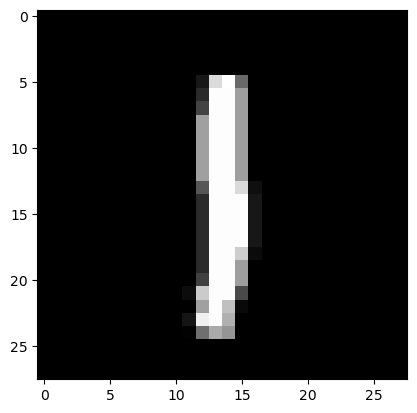

1/1 [==============================] - 0s 56ms/step
------------- indice: 0 0.0
------------- indice: 1 0.9965
------------- indice: 2 0.0029
------------- indice: 3 0.0
------------- indice: 4 0.0
------------- indice: 5 0.0
------------- indice: 6 0.0
------------- indice: 7 0.0006
------------- indice: 8 0.0
------------- indice: 9 0.0
1
1


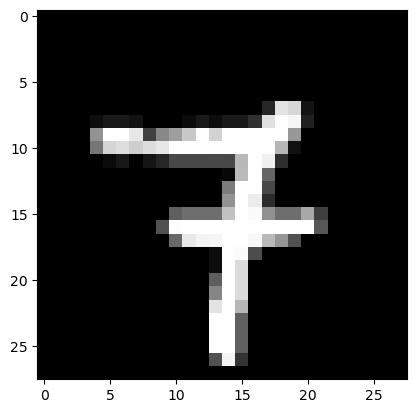

1/1 [==============================] - 0s 39ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 0.0
------------- indice: 4 0.0
------------- indice: 5 0.0
------------- indice: 6 0.0
------------- indice: 7 1.0
------------- indice: 8 0.0
------------- indice: 9 0.0
7
7


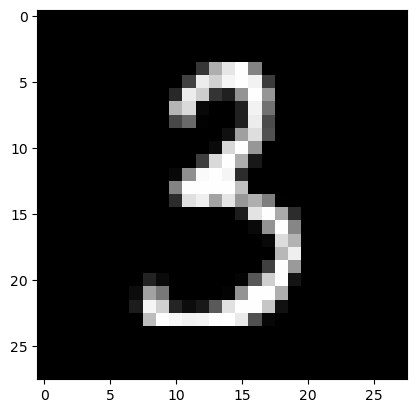

1/1 [==============================] - 0s 20ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 1.0
------------- indice: 4 0.0
------------- indice: 5 0.0
------------- indice: 6 0.0
------------- indice: 7 0.0
------------- indice: 8 0.0
------------- indice: 9 0.0
3
3


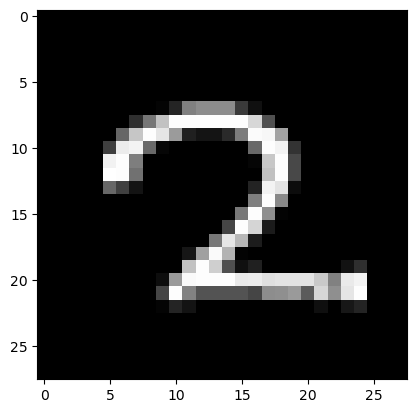

1/1 [==============================] - 0s 22ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 1.0
------------- indice: 3 0.0
------------- indice: 4 0.0
------------- indice: 5 0.0
------------- indice: 6 0.0
------------- indice: 7 0.0
------------- indice: 8 0.0
------------- indice: 9 0.0
2
2


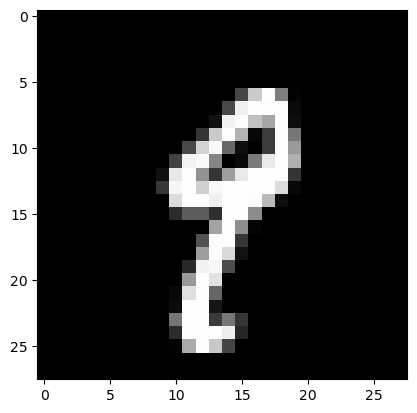

1/1 [==============================] - 0s 28ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 0.0
------------- indice: 4 0.0
------------- indice: 5 0.0
------------- indice: 6 0.0
------------- indice: 7 0.0
------------- indice: 8 0.0
------------- indice: 9 1.0
9
9


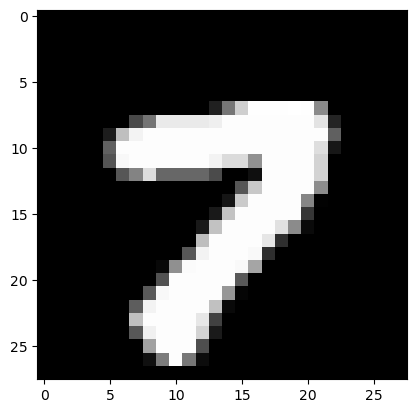

1/1 [==============================] - 0s 25ms/step
------------- indice: 0 0.0
------------- indice: 1 0.0
------------- indice: 2 0.0
------------- indice: 3 0.0
------------- indice: 4 0.0
------------- indice: 5 0.0
------------- indice: 6 0.0
------------- indice: 7 1.0
------------- indice: 8 0.0
------------- indice: 9 0.0
7
7


In [124]:
print("graph");
for i in range(50, 80):
    indice = i;
    plt.imshow(X_test[indice], cmap="gray");
    plt.show()
    
    def getOutput(arr):
        max = 0
        index = 0;
        winner = 0;
        for i in arr[0]:
            i = float(i)
            print("------------- indice:", index, round(i, 4))
            if( i > max ):
                max = i;
                winner = index;
            index += 1;
        return winner
    
    sample = X_test[indice].reshape(-1, 28*28).astype(np.float32)
    print(getOutput(tf.nn.softmax(model.predict(sample))))
    print(y_test[indice])